<a href="https://colab.research.google.com/github/mariamkuras/Default-of-Credit-Card/blob/main/Final_Default_of_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree                                # sklearn tree model for decision trees
from sklearn.model_selection import train_test_split    # for partitioning data
from sklearn.model_selection import cross_val_score     # for cross validation
from sklearn.metrics import roc_auc_score               # to assess decision tree perforamce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import io
from google.colab import files
import numpy as np                                      # array, vector, matrix calculations
import pandas as pd                                     # dataFrame handling
from matplotlib import pyplot as plt                    # plotting
import seaborn as sns                                   # slightly better plotting 
SEED=12345                                              # ALWAYS use a random seed for better reproducibility


Upload Training Data

In [2]:
uploaded =files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [3]:
uploaded.keys()

dict_keys(['UCI_Credit_Card.csv'])

In [4]:
# read data in pandas dataframe
data=pd.read_csv(io.StringIO(uploaded["UCI_Credit_Card.csv"].decode('utf-8')))

Data Dictionary

In [5]:
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

Basic Data Analysis

In [6]:
#rows,columns
data.shape

(30000, 25)

In [7]:
# column names
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
# Missing values
data.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [9]:
# descriptive statistics
data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59526f7dd0>,
      dtype=object)

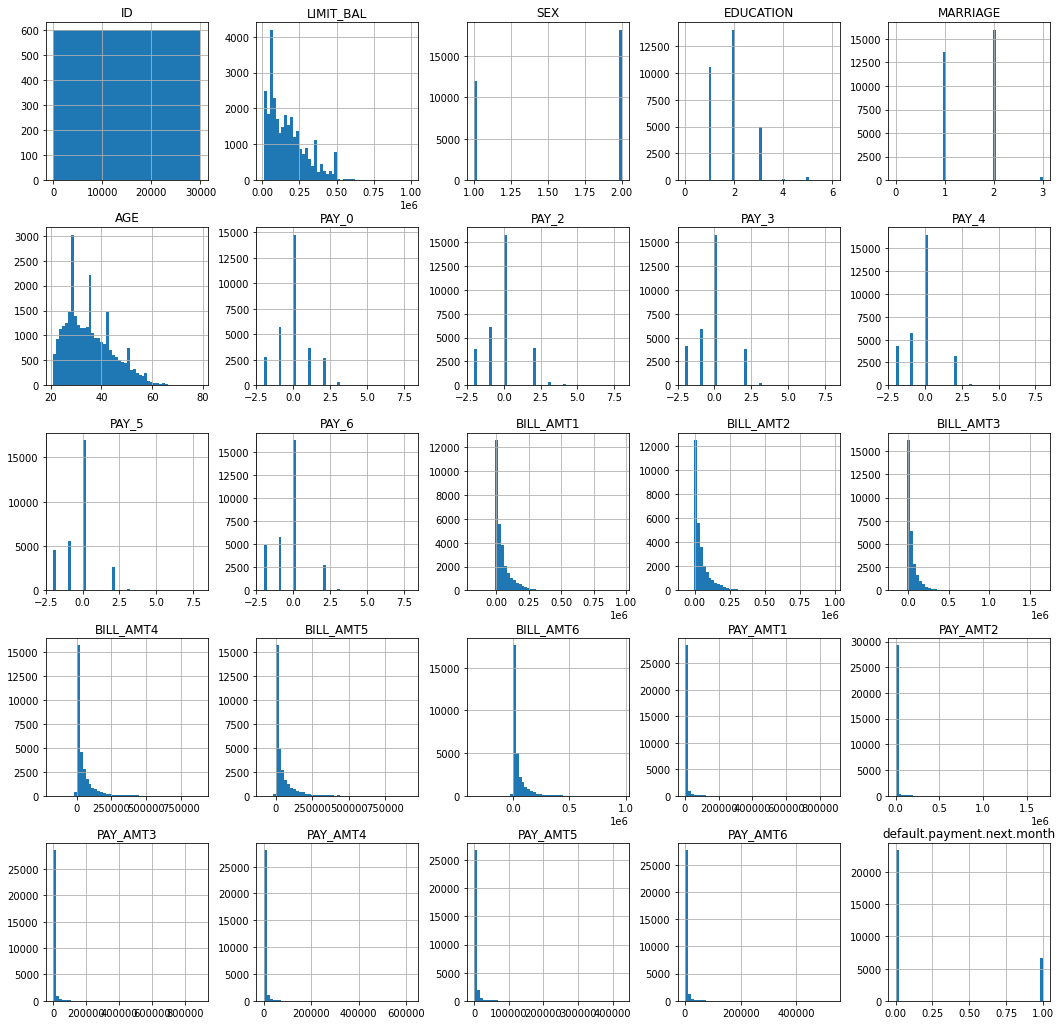

In [10]:
# Histograms
data[data.columns].hist(bins=50,figsize=(18,18))

In [11]:
# Pearson Correlation Matrix
corr=data.corr()
corr

ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.023581   
BILL_AMT2                   0.017982   0.278314 -0.031183   0.018749   
BILL_AMT3                   0.024354   0.283236 -0.024563   0.013002   
BILL_AMT4                   0.040351   0.293988 -0.021880  -0.000451   
BILL_AMT5                   0.016705   0.295562 -0.017005  -0.007567   
BILL_AMT6                   0.016730   0.290389 -0.016733  -0.009099   
PAY_AMT1                    0.009742   0.195236 -0.000242  -0.037456   
PAY_AMT2                    0.008406   0.178408 -0.001391  -0.030038   
PAY_AMT3                    0.039151   0.210167 -0.008597  -0.039943   
PAY_AMT4                    0.007793   0.203242 -0.002229  -0.038218   
PAY_AMT5                    0.000652   0.217202 -0.001667  -0.040358   
PAY_AMT6                    0.003000   0.219595 -0.002766  -0.037200   
default.payment.next.month -0.013952  -0.153520 -0.039961   0.028006   

                            MARRIAGE       AGE     PAY_0     PAY_2     PAY_3  \
ID                         -0.029079  0.018678 -0.030575 -0.011215 -0.018494   
LIMIT_BAL                  -0.108139  0.144713 -0.271214 -0.296382 -0.286123   
SEX                        -0.031389 -0.090874 -0.057643 -0.070771 -0.066096   
EDUCATION                  -0.143464  0.175061  0.105364  0.121566  0.114025   
MARRIAGE                    1.000000 -0.414170  0.019917  0.024199  0.032688   
AGE                        -0.414170  1.000000 -0.039447 -0.050148 -0.053048   
PAY_0                       0.019917 -0.039447  1.000000  0.672164  0.574245   
PAY_2                       0.024199 -0.050148  0.672164  1.000000  0.766552   
PAY_3                       0.032688 -0.053048  0.574245  0.766552  1.000000   
PAY_4                       0.033122 -0.049722  0.538841  0.662067  0.777359   
PAY_5                       0.035629 -0.053826  0.509426  0.622780  0.686775   
PAY_6                       0.034345 -0.048773  0.474553  0.575501  0.632684   
BILL_AMT1                  -0.023472  0.056239  0.187068  0.234887  0.208473   
BILL_AMT2                  -0.021602  0.054283  0.189859  0.235257  0.237295   
BILL_AMT3                  -0.024909  0.053710  0.179785  0.224146  0.227494   
BILL_AMT4                  -0.023344  0.051353  0.179125  0.222237  0.227202   
BILL_AMT5                  -0.025393  0.049345  0.180635  0.221348  0.225145   
BILL_AMT6                  -0.021207  0.047613  0.176980  0.219403  0.222327   
PAY_AMT1                   -0.005979  0.026147 -0.079269 -0.080701  0.001295   
PAY_AMT2                   -0.008093  0.021785 -0.070101 -0.058990 -0.066793   
PAY_AMT3                   -0.003541  0.029247 -0.070561 -0.055901 -0.053311   
PAY_AMT4                   -0.012659  0.021379 -0.064005 -0.046858 -0.046067   
PAY_AMT5                   -0.001205  0.022850 -0.058190 -0.037093 -0.035863   
PAY_AMT6                   -0.006641  0.019478 -0.058673 -0.036500 -0.035861   
default.payment.next.month -0.024339  0.013890  0.324794  0.263551  0.235253   

                               PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID

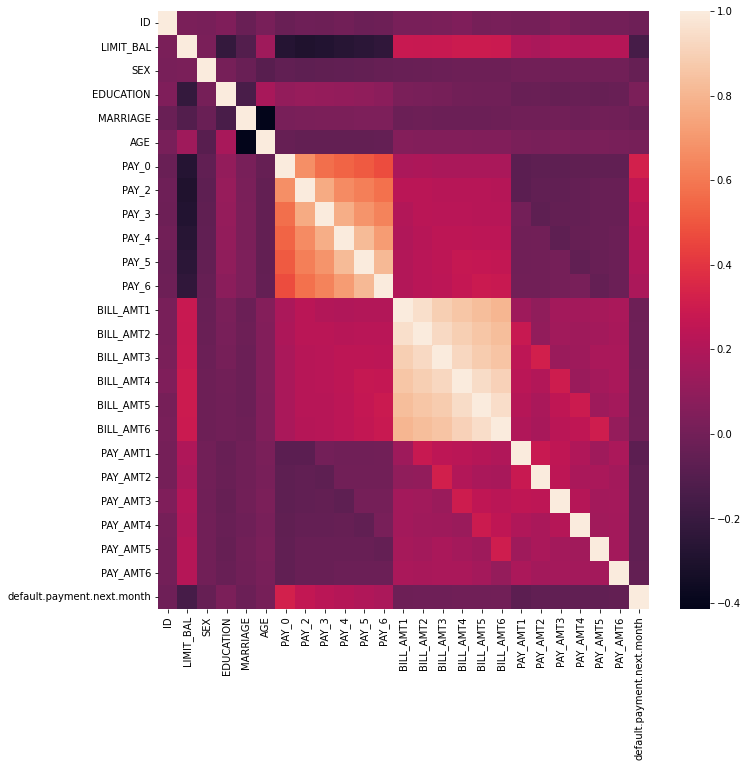

In [12]:
# Correlation Heatmap
plt.figure(figsize=(11, 11))
_= sns.heatmap(corr,xticklabels='auto', yticklabels='auto')

Decision Tree Training

In [13]:
y_name='default.payment.next.month'
x_names=['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
       

In [14]:
train_x, valid_test_x,train_y,valid_test_y=train_test_split(data[x_names],data[y_name], test_size=0.5,random_state=SEED)
valid_x, test_x, valid_y, test_y=train_test_split(valid_test_x, valid_test_y,test_size=0.5, random_state=SEED)

# summarizing 
print('Training data: %i rows and %i columns' % (train_x.shape[0],train_x.shape[1]+1))
print('Validation data: %i rows and %i columns' % (valid_x.shape[0],valid_x.shape[1]+1))
print('Validation data: %i rows and %i columns' % (test_x.shape[0],test_x.shape[1]+1))

# housekeeping
del valid_test_x
del valid_test_y


Training data: 15000 rows and 20 columns
Validation data: 7500 rows and 20 columns
Validation data: 7500 rows and 20 columns


In [15]:
# train decision tree 
# with validation-based early stopping
max_depth = 12
candidate_models = {}

# tree depths for the best model finding in validation data
for depth in range(0, max_depth):

  # fit a model 
  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=SEED)
  clf.fit(train_x, train_y)
  
  # training and validation data 
  train_phat = clf.predict_proba(train_x)[:, 1]
  valid_phat = clf.predict_proba(valid_x)[:, 1]
   
  # For performance calculating AUC
  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  # calculating cross calidation for stability
  cv_scores = cross_val_score(clf, valid_x, valid_y, scoring='roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  # Results
  candidate_models[depth + 1] = {} 
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std



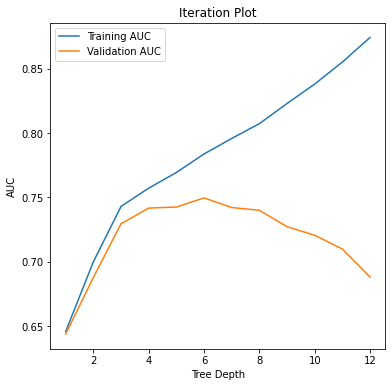

In [16]:
# Tree Depth plotting AUC
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index') 
fig, ax = plt.subplots(figsize=(6, 6))
_ = candidate_results[['Training AUC', 'Validation AUC']].plot(title='Iteration Plot',
                                                               ax=ax) 
_ = ax.set_xlabel('Tree Depth') 
_ = ax.set_ylabel('AUC')

In [17]:
# View it as table using iloc
candidate_results.iloc[:,1:]

Training AUC  Validation AUC  5-Fold SD
1       0.645748        0.643880   0.009275
2       0.699912        0.687752   0.012626
3       0.742968        0.729490   0.017375
4       0.757178        0.741696   0.017079
5       0.769331        0.742480   0.019886
6       0.783722        0.749610   0.017665
7       0.795777        0.742115   0.022466
8       0.807291        0.739990   0.015567
9       0.822913        0.727224   0.012042
10      0.838052        0.720562   0.013855
11      0.855168        0.709864   0.010405
12      0.874251        0.688074   0.008073

In [18]:
# plot the tree for human interpretation
best_model = candidate_models[6]['Model']
fig = plt.figure(figsize=(400, 70))
_ = tree.plot_tree(best_model,
                   feature_names=x_names,
                   class_names=['On time', 'Default'],
                   filled=True)

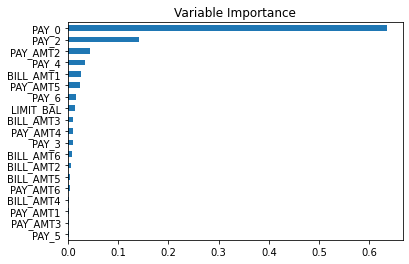

In [19]:
# plot variable importances 
# create pandas dataframe
# plot dataframe values
importances = pd.DataFrame(best_model.feature_importances_,
                           index=x_names,
                           columns=['Importance'])
_ = importances.sort_values(by='Importance').plot(kind='barh', title='Variable Importance', legend=False)

In [20]:
# final assessment AUC
test_phat=best_model.predict_proba(test_x)[:, 1] 
print('test AUC: %.4f' % roc_auc_score(test_y,test_phat))


test AUC: 0.7438


Function to create confusion matrices

In [23]:
# function for confusion matrices
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):

    # determine levels of target (y) variable 
    # sort for consistency
    level_list = list(frame[y].unique())
    level_list.sort(reverse=True)

    # init confusion matrix
    cm_frame = pd.DataFrame(columns=['actual: ' +  str(i) for i in level_list],
                            index=['predicted: ' + str(i) for i in level_list])
    
    # don't destroy original data
    frame_ = frame.copy(deep=True)

    # convert numeric predictions to binary decisions using cutoff
    dname = 'd_' + str(y)
    frame_[dname] = np.where(frame_[yhat] > cutoff , 1, 0)

    # slice frame
    if (by is not None) & (level is not None):
        frame_ = frame_[frame[by] == level]
    
    # calculate size of each confusion matrix value
    for i, lev_i in enumerate(level_list):
        for j, lev_j in enumerate(level_list):
            cm_frame.iat[j, i] = frame_[(frame_[y] == lev_i) & (frame_[dname] == lev_j)].shape[0]
            

    # output results
    if verbose:
        if by is None:
            print('Confusion matrix:')
        else:
            print('Confusion matrix by ' + by + '=' + str(level))

    return cm_frame


Function to calculate AIR

In [24]:
# function for AIR
def air(cm_dict, reference_key, protected_key, verbose=True):

    eps = 1e-20 

    # reference group summary
    reference_accepted = float(cm_dict[reference_key].iat[1,0] + cm_dict[reference_key].iat[1,1])
    reference_total = float(cm_dict[reference_key].sum().sum())
    reference_prop = reference_accepted/reference_total
    if verbose:
        print(reference_key.title() + ' proportion accepted: %.3f' % reference_prop)

    # protected group summary
    protected_accepted = float(cm_dict[protected_key].iat[1,0] + cm_dict[protected_key].iat[1,1]) 
    protected_total = float(cm_dict[protected_key].sum().sum())
    protected_prop = protected_accepted/protected_total
    if verbose:
        print(protected_key.title() + ' proportion accepted: %.3f' % protected_prop)
    
    # return adverse impact ratio
    return ((protected_prop + eps)/(reference_prop + eps))

Bias Testing

In [25]:
# add probabilities onto validation set
valid_yhat = pd.DataFrame(valid_x, columns=x_names)
valid_yhat['EDUCATION'] = data.loc[valid_yhat.index, 'EDUCATION']
valid_yhat['SEX'] = data.loc[valid_yhat.index, 'SEX']
valid_yhat[y_name]  = valid_y
valid_yhat['phat'] = best_model.predict_proba(valid_x)[:, 1]
valid_yhat.head()


LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
10752   470000.0      0      0      0      0      0      0   181224.0   
24174   260000.0     -1      0      0      0      0      0   182329.0   
13524    80000.0      0      0      0      0      0      0    78009.0   
13049    50000.0      1      2      0      0      0      0    51421.0   
23427   200000.0      1      2      0      0      0      0    18021.0   

       BILL_AMT2  BILL_AMT3  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
10752   143173.0   145293.0  ...    7000.0    6000.0    6000.0    6000.0   
24174   181133.0   177351.0  ...   10000.0   10000.0   10000.0   10000.0   
13524    78616.0    49662.0  ...    2420.0    2000.0    1656.0    1693.0   
13049    50322.0    49741.0  ...       0.0    1379.0     945.0    2002.0   
23427    17374.0    15463.0  ...       0.0    3027.0    6223.0       0.0   

       PAY_AMT5  PAY_AMT6  EDUCATION  SEX  default.payment.next.month  \
10752    6000.0    8000.0          2    1                           0   
24174   10000.0   17000.0          1    1                           0   
13524    1767.0    1581.0          3    2                           0   
13049    2008.0    1002.0          3    2                           1   
23427       0.0       0.0          3    2                           0   

           phat  
10752  0.070193  
24174  0.070193  
13524  0.119735  
13049  0.372789  
23427  0.372789  

[5 rows x 23 columns]

In [26]:
# calculate confusion matrices across education
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR
edu_dict = {'graduate school': 1,
             'university': 2,
             'high school': 3,
             'others': 4}

edu_group_names = list(edu_dict.keys())
edu_cm_dict = {}

# calculate confusion matrices at standard cutoff 0.15
for name in edu_group_names:
    edu_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='EDUCATION', level=edu_dict[name], cutoff=0.15)
    print(edu_cm_dict[name])
    print('(%s)' % name.title())
    print()

# calculate AIR
for name in edu_group_names:
   if name != 'graduate school':
      print('%s-to-%s AIR: %.2f' % (name, 'graduate school', air(edu_cm_dict, 'graduate school', name)))
      print()

Confusion matrix by EDUCATION=1
             actual: 1 actual: 0
predicted: 1       367       766
predicted: 0       144      1359
(Graduate School)

Confusion matrix by EDUCATION=2
             actual: 1 actual: 0
predicted: 1       640      1115
predicted: 0       216      1551
(University)

Confusion matrix by EDUCATION=3
             actual: 1 actual: 0
predicted: 1       249       409
predicted: 0        65       496
(High School)

Confusion matrix by EDUCATION=4
             actual: 1 actual: 0
predicted: 1         0         9
predicted: 0         0        19
(Others)

Graduate School proportion accepted: 0.570
University proportion accepted: 0.502
university-to-graduate school AIR: 0.88

Graduate School proportion accepted: 0.570
High School proportion accepted: 0.460
high school-to-graduate school AIR: 0.81

Graduate School proportion accepted: 0.570
Others proportion accepted: 0.679
others-to-graduate school AIR: 1.19



In [27]:
# calculate confusion matrices across sex groups
# calculate AIR
sex_dict = {'male': 1,
            'female': 2}

sex_group_names = list(sex_dict.keys())
sex_cm_dict = {}

# calculate confusion matrices at standard cutoff 0.15
for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.15)
    print(sex_cm_dict[name])
    print('(%s)' % name.title())
    print()

# calculate AIR
for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()


Confusion matrix by SEX=1
             actual: 1 actual: 0
predicted: 1       546       905
predicted: 0       179      1292
(Male)

Confusion matrix by SEX=2
             actual: 1 actual: 0
predicted: 1       712      1427
predicted: 0       248      2191
(Female)

Male proportion accepted: 0.503
Female proportion accepted: 0.533
female-to-male AIR: 1.06



Bias Remediation

In [28]:
# calculate accuracy at a certain probability cutoff
def get_acc(frame, cutoff, y_name, yhat_name):

  temp = frame.copy(deep=True) 
  temp['decision'] = np.where(temp[yhat_name] > cutoff , 1, 0)
  acc = accuracy_score(temp[y_name], temp['decision'])
  del temp
  return acc

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
for cutoff in np.arange(0.1, 0.31, 0.01):
  print('Accuracy at cutoff %.2f is: %.4f' % (np.round(cutoff, 2), 
                                              get_acc(valid_yhat, np.round(cutoff, 2), y_name, 'phat')))   

Accuracy at cutoff 0.10 is: 0.4463
Accuracy at cutoff 0.11 is: 0.4907
Accuracy at cutoff 0.12 is: 0.6321
Accuracy at cutoff 0.13 is: 0.6321
Accuracy at cutoff 0.14 is: 0.6321
Accuracy at cutoff 0.15 is: 0.6321
Accuracy at cutoff 0.16 is: 0.6321
Accuracy at cutoff 0.17 is: 0.6321
Accuracy at cutoff 0.18 is: 0.7384
Accuracy at cutoff 0.19 is: 0.7631
Accuracy at cutoff 0.20 is: 0.7631
Accuracy at cutoff 0.21 is: 0.7631
Accuracy at cutoff 0.22 is: 0.7631
Accuracy at cutoff 0.23 is: 0.7631
Accuracy at cutoff 0.24 is: 0.7631
Accuracy at cutoff 0.25 is: 0.7716
Accuracy at cutoff 0.26 is: 0.7716
Accuracy at cutoff 0.27 is: 0.7716
Accuracy at cutoff 0.28 is: 0.7716
Accuracy at cutoff 0.29 is: 0.7716
Accuracy at cutoff 0.30 is: 0.7743


In [31]:
#recalculate AIR and confusion matrices at different cutoff
#recalculate education confusion matrices at different cutoff
for name in edu_group_names:
    edu_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='EDUCATION', level=edu_dict[name], cutoff=0.18, verbose=False)

#recalculate education AIR
for name in edu_group_names:
   if name != 'graduate school':
      print('%s-to-%s AIR: %.2f' % (name, 'graduate school', air(edu_cm_dict, 'graduate school', name)))
      print()

# calculate sex confusion matrices at different cutoff
for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.18, verbose=False)

# calculate sex AIR
for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()


Graduate School proportion accepted: 0.710
University proportion accepted: 0.685
university-to-graduate school AIR: 0.97

Graduate School proportion accepted: 0.710
High School proportion accepted: 0.650
high school-to-graduate school AIR: 0.92

Graduate School proportion accepted: 0.710
Others proportion accepted: 0.857
others-to-graduate school AIR: 1.21

Male proportion accepted: 0.682
Female proportion accepted: 0.696
female-to-male AIR: 1.02



In [32]:
# train decision tree 
# with validation-based early stopping
# and AIR Calculation
max_depth = 12
candidate_models = {}

#tree depths 
for depth in range(0, max_depth):

  # fit a model 
  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=SEED)
  clf.fit(train_x, train_y)

  # training and validation data
  train_phat = clf.predict_proba(train_x)[:, 1]
  valid_phat = clf.predict_proba(valid_x)[:, 1]

  # calculate AUC for performance
  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

   # calculate AUC 
  valid_yhat = pd.DataFrame(valid_x, columns=x_names)
  valid_yhat['EDUCATION'] = data.loc[valid_yhat.index, 'EDUCATION']
  valid_yhat[y_name] = valid_y
  valid_yhat['phat'] = valid_phat
  cm_dict = {}
  cm_dict['high school'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='EDUCATION', level=3, cutoff=0.18, verbose=False)
  cm_dict['graduate school'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='EDUCATION', level=1, cutoff=0.18, verbose=False)
  valid_high_air = air(cm_dict, 'high school', 'graduate school', verbose=False)

  # cross validation scores to assess stability
  cv_scores = cross_val_score(clf, valid_x, valid_y, scoring='roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  # store results
  candidate_models[depth + 1] = {}
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std
  candidate_models[depth + 1]['graduate school-to-high school AIR'] = valid_high_air

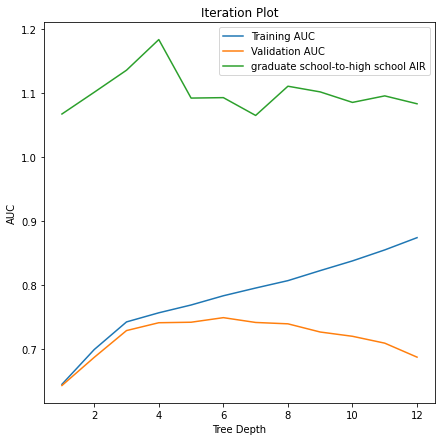

In [33]:
# plot tree depth vs. training and validation AUC and AIR
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index') 
fig, ax = plt.subplots(figsize=(7, 7))
_ = candidate_results[['Training AUC', 'Validation AUC', 'graduate school-to-high school AIR']].plot(title='Iteration Plot',
                                                                                        ax=ax) 
_ = ax.set_xlabel('Tree Depth') 
_ = ax.set_ylabel('AUC')        


* **Training** **AUC**: 0.78
* **Validation** **AUC**: 0.74
* **Test** **AUC**: 0.7438
* **others**-**to**-graduate school **AIR**: 1.21
* **university**-**to**-graduate school **AIR**: 0.97
* **Female**-**to**-Male **AIR**: 1.02
* **high school**-**to**-graduate school **AIR**: 0.92